In [1]:
import requests
import json
from config import api_key
import kaggle
import pandas as pd
import csv
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
url = "https://www.kaggle.com/datasets/kaushiksuresh147/top-10-cryptocurrencies-historical-dataset"

In [3]:
#creating data frames from bitcoin and ethereum csv files
df_bitcoin = pd.read_csv('/Users/tristian/Desktop/project1_practice/Top_100_Crypto_Coins/bitcoin.csv', index_col=False)
df_ethereum = pd.read_csv('/Users/tristian/Desktop/project1_practice/Top_100_Crypto_Coins/ethereum.csv')

In [4]:
#condensing bitcoin data to obtain necessary data columns
df_bc = df_bitcoin.loc[:,['Date','Volume', 'Close']]
#condensed bitcoin data to covid outbreak timeline for year 2020 and reseting index
df_bit_range = df_bc.loc[(df_bc['Date'] >= '2020-01-01') & (df_bc['Date'] <='2020-12-31')]
df_btc = df_bit_range.reset_index(drop= True)
df_btc

,Date,Volume,Close
0,2020-01-01,420278,7199.8
1,2020-01-02,632778,6967.0
2,2020-01-03,936288,7343.1
3,2020-01-04,523909,7376.8
4,2020-01-05,628142,7372.5
...,...,...,...
361,2020-12-27,231227,26261.3
362,2020-12-28,126979,27057.8
363,2020-12-29,119570,27376.0
364,2020-12-30,159824,28868.7


In [5]:
#condensing ethereum data obtain necessary data columns
df_et = df_ethereum.loc[:,['Date','Volume', 'Close']]
#condensed ethereum data to fit covid outbreak timeline for 2020 and reseting index 
df_et_range = df_et.loc[(df_et['Date'] >= '2020-01-01') & (df_et['Date'] <='2020-12-31')]
df_eth = df_et_range.reset_index(drop=True)
df_eth

,Date,Volume,Close
0,2020-01-01,10353998,130.75
1,2020-01-02,11446378,127.19
2,2020-01-03,15674423,134.27
3,2020-01-04,11160462,134.33
4,2020-01-05,12192829,135.59
...,...,...,...
361,2020-12-27,2312255,683.71
362,2020-12-28,2746912,730.05
363,2020-12-29,1817668,731.76
364,2020-12-30,1858262,751.80


In [6]:
# changing the date values from object to datetime variables
df_eth['Date'] = pd.to_datetime(df_eth['Date'])
df_eth

,Date,Volume,Close
0,2020-01-01,10353998,130.75
1,2020-01-02,11446378,127.19
2,2020-01-03,15674423,134.27
3,2020-01-04,11160462,134.33
4,2020-01-05,12192829,135.59
...,...,...,...
361,2020-12-27,2312255,683.71
362,2020-12-28,2746912,730.05
363,2020-12-29,1817668,731.76
364,2020-12-30,1858262,751.80


In [7]:
#adding a month column and converting the date values to corresponding months
df_eth['Month'] = (df_eth['Date'].dt.month)

In [8]:
# changing the date values from object to datetime variables
df_btc['Date'] = pd.to_datetime(df_btc['Date'])
df_btc

,Date,Volume,Close
0,2020-01-01,420278,7199.8
1,2020-01-02,632778,6967.0
2,2020-01-03,936288,7343.1
3,2020-01-04,523909,7376.8
4,2020-01-05,628142,7372.5
...,...,...,...
361,2020-12-27,231227,26261.3
362,2020-12-28,126979,27057.8
363,2020-12-29,119570,27376.0
364,2020-12-30,159824,28868.7


In [9]:
# changing the date values from object to datetime variables
df_btc['Month'] = (df_btc['Date'].dt.month)

In [10]:
#checking to see the types of variables are within dataframe
df_btc.dtypes

Date      datetime64[ns]
Volume             int64
Close            float64
Month              int64
dtype: object

In [11]:
#checking to see the types of variables are within dataframe
df_eth.dtypes

Date      datetime64[ns]
Volume             int64
Close            float64
Month              int64
dtype: object

In [12]:
#creating a another data frame that has Ethereum's average volume trade for each month in 2020
avg_vol = df_eth.groupby('Month')['Volume'].mean()
df_eth_avg = pd.DataFrame(avg_vol)
df_eth_avg

,Volume
Month,
1,1.329285e+07
2,1.923383e+07
3,2.565697e+07
4,2.517362e+07
5,1.764798e+07
6,7.311467e+06
7,7.653654e+06
8,8.004730e+06
9,1.365022e+07


In [13]:
#creating a another data frame that has Bitcoins's average volume trade for each month in 2020
avg_bc_vol = df_btc.groupby('Month')['Volume'].mean()
df_btc_avg = pd.DataFrame(avg_bc_vol)
df_btc_avg

,Volume
Month,
1,7.567685e+05
2,8.066006e+05
3,1.543857e+06
4,1.320380e+06
5,1.238926e+06
6,5.112715e+05
7,4.272897e+05
8,4.996779e+05
9,2.796000e+06


In [14]:
#added cryto name column to use for independent t test 
df_btc['crypto'] = 'Bitcoin'
df_eth['crypto'] = 'Ethereum'

In [15]:

# null: there is no significant change in bitcoin & etherium trade volume during
#covid time frame of 01-01-20 through 12-31-20

#alt:there is no significant change in bitcoin & etherium trade volume during 
#covid time frame of 01-01-20 through 12-31-20

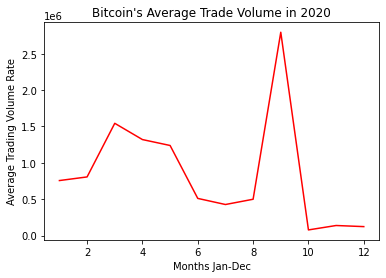

In [16]:
#visualization that depics the average trade volume of Bitcoin during covid in 2020
plt.plot(df_btc_avg.index, df_btc_avg['Volume'], color='red')
plt.xlabel('Months Jan-Dec', fontsize=10)
plt.ylabel('Average Trading Volume Rate', fontsize=10)

plt.title("Bitcoin's Average Trade Volume in 2020")
plt.show()

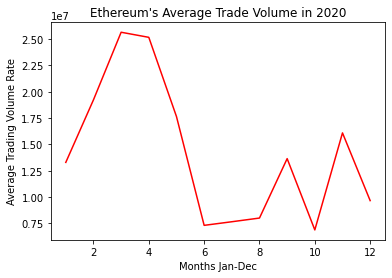

In [17]:
#visualization that depics the average trade volume of Ethereum during covid in 2020
plt.plot(df_eth_avg.index, df_eth_avg['Volume'], color='red')
plt.xlabel('Months Jan-Dec', fontsize=10)
plt.ylabel('Average Trading Volume Rate', fontsize=10)

plt.title("Ethereum's Average Trade Volume in 2020")
plt.show()

In [20]:
#independent sample t-test was performed to determine if BTC and ETH trade volumes are the same 
group1 = dfE[dfE['crypto'] == 'Ethereum']
group2 = dfB[dfB['crypto'] == 'Bitcoin']
stats.ttest_ind(group1['Volume'], group2['Volume'])

Ttest_indResult(statistic=16.03566033610832, pvalue=3.731545357030527e-42)

In [ ]:
# With a pvalue of 3.73e-42 we reject the null hypothesis that there is no significant change in bitcoin & etherium
#trade volume during covid time frame of 01-01-20 through 12-31-21

In [19]:
# created function that wil randomly sample value from populations to run an independent t test 
dfB = df_btc.sample(150,random_state=42 )
dfE = df_eth.sample(150,random_state=42 )
dfB

,Date,Volume,Close,Month,crypto
193,2020-07-12,366879,9300.8,7,Bitcoin
33,2020-02-03,701391,9296.6,2,Bitcoin
15,2020-01-16,748321,8726.9,1,Bitcoin
310,2020-11-06,186125,15577.9,11,Bitcoin
57,2020-02-27,1133327,8818.6,2,Bitcoin
...,...,...,...,...,...
247,2020-09-04,12502713,10472.5,9,Bitcoin
167,2020-06-16,545468,9523.5,6,Bitcoin
199,2020-07-18,276397,9170.2,7,Bitcoin
92,2020-04-02,1738795,6800.5,4,Bitcoin


Text(0.5, 1.0, 'Frequency of Ethereum and Bitcoin Trade Volume in 2020 ')

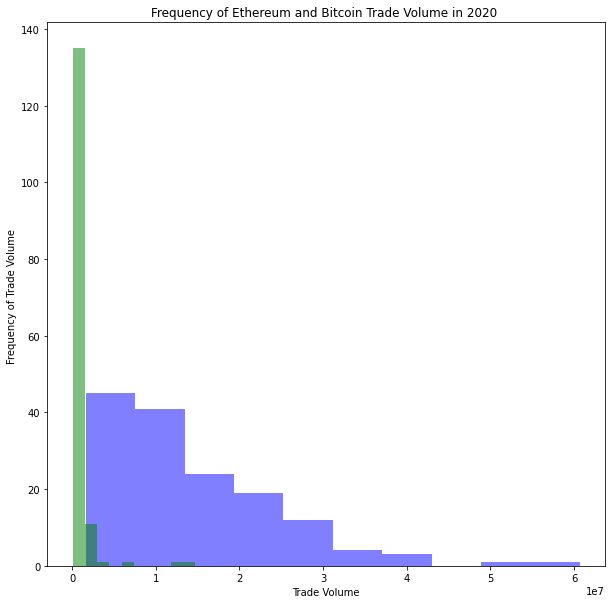

In [36]:
plt.figure(figsize=(10,10))
plt.hist(dfE['Volume'], label="dfE", color ='blue', alpha=0.5)
plt.hist(dfB['Volume'], label="dfB", color = 'green', alpha=0.5)
plt.xlabel('Trade Volume')
plt.ylabel('Frequency of Trade Volume ')
plt.title("Frequency of Ethereum and Bitcoin Trade Volume in 2020 ")